# Pymaceuticals Inc.
---

### Analysis

In total, 248 mices were tested: 51% male, 49% female. The highest number of mice were treated with Capomulin(230 mice) and the second highest number (228) is for the mice treated with Ramicane.The analysis of box plots for selected treatments shows that Capomulin and Ramicane worked better during the course of 45 days. 
Some statistical analysis are done for the mice data treated with Capomulin. From "Capomulin treatment of mouse l509" chart we can see that the treatment helps the mouse overall. The tumor final volume is smaller than the volume at the beginning. But the graph increases and decreases at some times, which might be related to diferent factors, not only the treatment.
However, this is only a data of one mouse. So, more analysis is needed to understand the graph variations. 
One major factor having an impact to tumor is the weight. For Capomulin, the correlation analysis ("Correlation and Regression" chart) shows that when mice weight increases, the tumor volume also increases: the correlation is positive and close to 1 (0.84).
Basing on the Box Plot, we can conclude that Capomulin has more efficiency than Infubinol and Ceftamin. However, the plot data of Ramicane is very close to that of Capomulin, so in order to determine more clearly which of these treatments is more effective, more data and analysis will be required. For example, we could compare average tumor volume differences between last and first timepoints for each treatment. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_not_clean_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_not_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number_duplicated = len(mouse_study_not_clean_df["Mouse ID"].unique())
mice_number_duplicated

249

In [3]:
mouse_study_not_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
#Duplicate mice that shows up for Mouse ID and Timepoint
mouse_duplicated_df = mouse_study_not_clean_df[mouse_study_not_clean_df.duplicated(['Mouse ID','Timepoint'], keep = False)]
mouse_duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicated_df['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_duplicated_df_opt = mouse_study_not_clean_df.loc[mouse_duplicated_df['Mouse ID']]
mouse_duplicated_df_opt = mouse_study_not_clean_df[mouse_study_not_clean_df['Mouse ID'].isin(mouse_duplicated_df['Mouse ID'])]
mouse_duplicated_df_opt

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# The cleaned database is made by removing all the entries of Mouse IDs found in mouse_duplicated_df_opt 
# (in  this case it's "g989" ID) from the original database.
mouse_study_df = mouse_study_not_clean_df[~mouse_study_not_clean_df["Mouse ID"].isin(mouse_duplicated_df_opt["Mouse ID"])]
#mouse_study_df = mouse_study_not_clean_df.drop_duplicates(keep=False)
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(mouse_study_df["Mouse ID"].unique())
mice_number

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_per_drug = mouse_study_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_per_drug = mouse_study_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance_per_drug = mouse_study_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_dev_per_drug = mouse_study_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SEM_per_drug = mouse_study_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({'Mean Tumor Volume':mean_per_drug, 'Median Tumor Volume':median_per_drug,'Tumor Volume Variance':variance_per_drug, 'Tumor Volume Std. Dev':std_dev_per_drug, 'Tumor Volume Std. Err.':SEM_per_drug})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
 summary_agg_df = mouse_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_agg_df.style.set_table_styles([{'selector': 'caption', 'props': [('tex-align', 'right')]}])

## Bar and Pie Charts

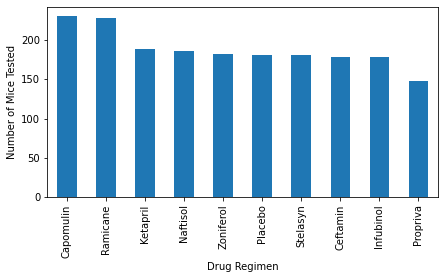

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Use DataFrame.plot() in order to create a bar chart of the data
timepoints_count_per_mouse = mouse_study_df.groupby(['Drug Regimen']).count()
timepoints_count_per_mouse_df = timepoints_count_per_mouse[['Timepoint']].sort_values('Timepoint', ascending=False)
timepoints_count_per_mouse_df
timepoints_count_per_mouse_df.plot(kind='bar', figsize=(7,3.5), legend=None)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [12]:
timepoints_count_per_mouse_df

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


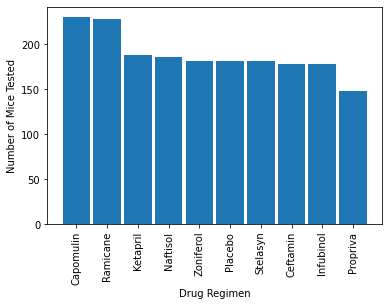

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = timepoints_count_per_mouse_df.index

plt.bar(x_axis, timepoints_count_per_mouse_df['Timepoint'], width = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

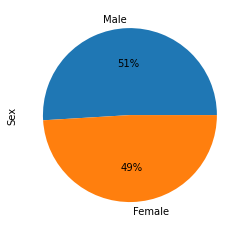

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
numbers_list = [(mouse_study_df['Sex'].value_counts()[0]), (mouse_study_df['Sex'].value_counts()[1])]
#numbers_list
sex_list = ['Male', 'Female']
numbers_df = pd.DataFrame({'Sex':sex_list, 'Numbers':numbers_list})
numbers_df.set_index('Sex', inplace = True)

male_female_pie = numbers_df.plot(kind="pie", y='Numbers', autopct="%.0f%%")
male_female_pie.set_ylabel('Sex')
male_female_pie.legend().set_visible(False)
plt.show()


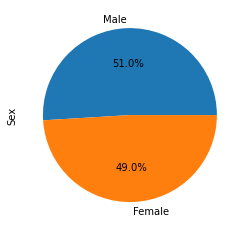

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
numbers = [(mouse_study_df['Sex'].value_counts()[0]), (mouse_study_df['Sex'].value_counts()[1])]
#numbers
plt.pie(numbers, labels = labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mask = mouse_study_df[(mouse_study_df['Drug Regimen']=='Ceftamin') |(mouse_study_df['Drug Regimen']=='Infubinol') | (mouse_study_df['Drug Regimen']=='Ramicane') | 
    (mouse_study_df['Drug Regimen']=='Capomulin')]

last_timepoint = mask.groupby('Mouse ID').max()['Timepoint']
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_last_df = pd.merge(mouse_study_df, last_timepoint, how="right", on=["Mouse ID", "Timepoint"])
tumor_volume_last_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25


In [62]:
mask_treatments = tumor_volume_last_df['Drug Regimen'].unique()
treatments = np.flip(mask_treatments,0)
# Create empty list to fill with tumor vol data (for plotting)
volumes_list = []

# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatments:
    tumor_volume_data = tumor_volume_last_df[tumor_volume_last_df['Drug Regimen'] == treatment]
    tumor_volume_data.sort_values('Tumor Volume (mm3)')
    volumes_per_treatment = tumor_volume_data["Tumor Volume (mm3)"]
    
    quartiles = tumor_volume_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    first_q = quartiles[0.25]
    third_q = quartiles[0.75]
    iqr = third_q - first_q
    lower_bound = first_q-(1.5*iqr)
    upper_bound = third_q +(1.5*iqr)
    outliers = volumes_per_treatment.loc[(volumes_per_treatment < lower_bound) | (volumes_per_treatment > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    volumes_list.append(volumes_per_treatment)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


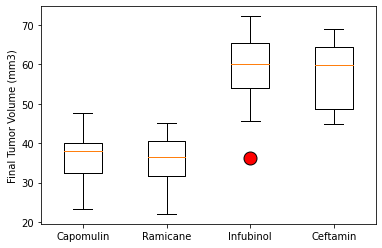

In [60]:
red_circle = dict(markerfacecolor='red', marker='o', markersize=13)
plt.boxplot([volumes_list[0], volumes_list[1], volumes_list[2], volumes_list[3]],labels=treatments, flierprops=red_circle)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

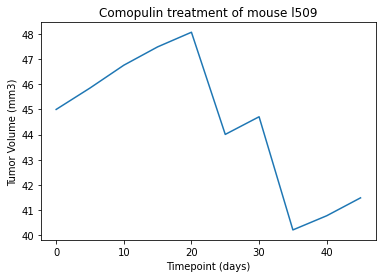

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#This plot is generated for MouseID = l509 to match the chart of tamplate solution 
l509_mouse_data = mouse_study_df[(mouse_study_df['Mouse ID'] == 'l509')&(mouse_study_df['Drug Regimen'] == 'Capomulin')]
l509_mouse_data

l509_mouse_plot = l509_mouse_data.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)', legend = None, title = "Comopulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


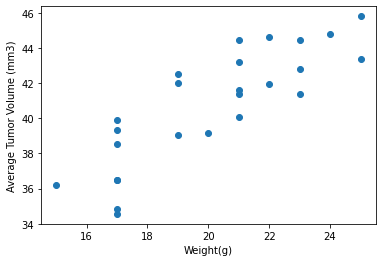

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mask = mouse_study_df[mouse_study_df['Drug Regimen']=='Capomulin']
mask
weights = mask['Weight (g)'].sort_values()
weights
#volume_per_mouse = []

avg_volumes_perID = mask.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()
avg_volumes_perID_df = avg_volumes_perID.reset_index()
avg_volumes_perID_df_sorted = avg_volumes_perID_df.sort_values('Weight (g)')
avg_volumes_perID_df_sorted

weights = avg_volumes_perID_df['Weight (g)']
average_volumes = avg_volumes_perID_df['Tumor Volume (mm3)']

plt.scatter(weights, average_volumes)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


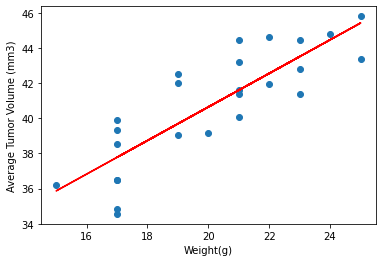

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on mouse weight versus average (by timepoint) tumor volume for the Capomulin regimen
x_axis_data = weights
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_axis_data, average_volumes)
print(f"The correlation between mouse weight and the average tumor volume is {round(pe_r,2)}")
volume_line = pe_slope * weights + pe_int

# Plot the linear model on top of scatter plot 
plt.scatter(weights, average_volumes)
plt.plot(weights,volume_line,  color="r")

plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()